61


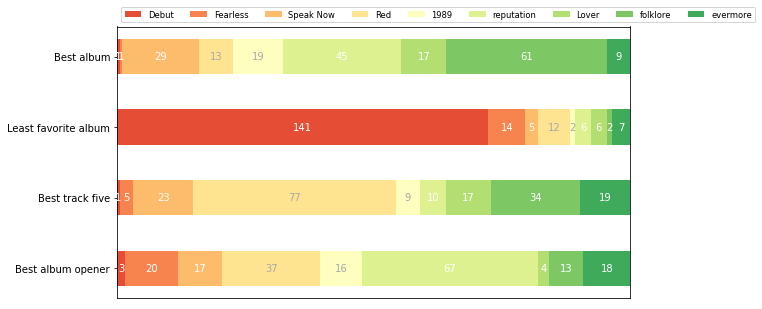

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.axes as ax

df1 = pd.read_csv("../input/taylor1/TaylorSwiftForm.csv")
# album_names = ["Taylor Swift", "Fearless (Taylor's Version)", "Speak Now", "Red", "1989", "reputation", "Lover", "folklore", "evermore"]
print(df1["Best Album"].value_counts()["folklore"])

category_names = ['Debut', 'Fearless', 'Speak Now', 'Red', '1989', 'reputation', 'Lover', 'folklore', 'evermore']

# results = {
#     'Taylor Swift': [df1["Best Album"].value_counts()["Debut"], df1["Least Favorite Album"].value_counts()["Debut"], df1["Favorite Track five"].value_counts()["Cold As You"], df1["Favorite Album Opener"].value_counts()["Tim McGraw"]],
#     "Fearless": [df1["Best Album"].value_counts()["Fearless"], df1["Least Favorite Album"].value_counts()["Fearless"], df1["Favorite Track five"].value_counts()["White Horse"], df1["Favorite Album Opener"].value_counts()["Fearless"]],
#     "Red": [df1["Best Album"].value_counts()["Red"], df1["Least Favorite Album"].value_counts()["Red"], df1["Favorite Track five"].value_counts()["All Too Well"], df1["Favorite Album Opener"].value_counts()["State Of Grace"]],
#     "1989": [df1["Best Album"].value_counts()["1989"], df1["Least Favorite Album"].value_counts()["1989"], df1["Favorite Track five"].value_counts()["All You Had To Do Was Stay"], df1["Favorite Album Opener"].value_counts()["Welcome To New York"]],
#     "reputation": [df1["Best Album"].value_counts()["reputation"], df1["Least Favorite Album"].value_counts()["reputation"], df1["Favorite Track five"].value_counts()["Delicate"], df1["Favorite Album Opener"].value_counts()["...Ready For It?"]],
#     "Lover": [df1["Best Album"].value_counts()["Lover"], df1["Least Favorite Album"].value_counts()["Lover"], df1["Favorite Track five"].value_counts()["The Archer"], df1["Favorite Album Opener"].value_counts()["I Forgot That You Existed"]],
#     "folklore": [df1["Best Album"].value_counts()["folklore"], df1["Least Favorite Album"].value_counts()["folklore"], df1["Favorite Track five"].value_counts()["my tears ricochet"], df1["Favorite Album Opener"].value_counts()["the 1"]],
#     "evermore": [df1["Best Album"].value_counts()["evermore"], df1["Least Favorite Album"].value_counts()["evermore"], df1["Favorite Track five"].value_counts()["tolerate it"], df1["Favorite Album Opener"].value_counts()["willow"]]
# }

results = {
    'Best album': [df1["Best Album"].value_counts()["Debut"], df1["Best Album"].value_counts()["Fearless"], df1["Best Album"].value_counts()["Speak Now"], df1["Best Album"].value_counts()["Red"], df1["Best Album"].value_counts()["1989"],df1["Best Album"].value_counts()["reputation"], df1["Best Album"].value_counts()["Lover"], df1["Best Album"].value_counts()["folklore"], df1["Best Album"].value_counts()["evermore"]],
    "Least favorite album": [df1["Least Favorite Album"].value_counts()["Debut"], df1["Least Favorite Album"].value_counts()["Fearless"], df1["Least Favorite Album"].value_counts()["Speak Now"], df1["Least Favorite Album"].value_counts()["Red"],df1["Least Favorite Album"].value_counts()["1989"], df1["Least Favorite Album"].value_counts()["reputation"], df1["Least Favorite Album"].value_counts()["Lover"], df1["Least Favorite Album"].value_counts()["folklore"], df1["Least Favorite Album"].value_counts()["evermore"]],
    "Best track five": [df1["Favorite Track five"].value_counts()["Cold As You"], df1["Favorite Track five"].value_counts()["White Horse"], df1["Favorite Track five"].value_counts()["Dear John"], df1["Favorite Track five"].value_counts()["All Too Well"], df1["Favorite Track five"].value_counts()["All You Had To Do Was Stay"],df1["Favorite Track five"].value_counts()["Delicate"],df1["Favorite Track five"].value_counts()["The Archer"], df1["Favorite Track five"].value_counts()["my tears ricochet"],df1["Favorite Track five"].value_counts()["tolerate it"]],
    "Best album opener": [df1["Favorite Album Opener"].value_counts()["Tim McGraw"], df1["Favorite Album Opener"].value_counts()["Fearless"], df1["Favorite Album Opener"].value_counts()["Mine"], df1["Favorite Album Opener"].value_counts()["State Of Grace"], df1["Favorite Album Opener"].value_counts()["Welcome To New York"], df1["Favorite Album Opener"].value_counts()["...Ready For It?"], df1["Favorite Album Opener"].value_counts()["I Forgot That You Existed"], df1["Favorite Album Opener"].value_counts()["the 1"], df1["Favorite Album Opener"].value_counts()["willow"]]
    }

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()
